In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('../Data/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#It gives the total count of each field and data typesabs
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#It will give you value counts of each tyoe of data inside a column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#It will give the summary of the numerical attributes of the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#With this data you cant understand so much about the dataset thats why we will convert it into a graph

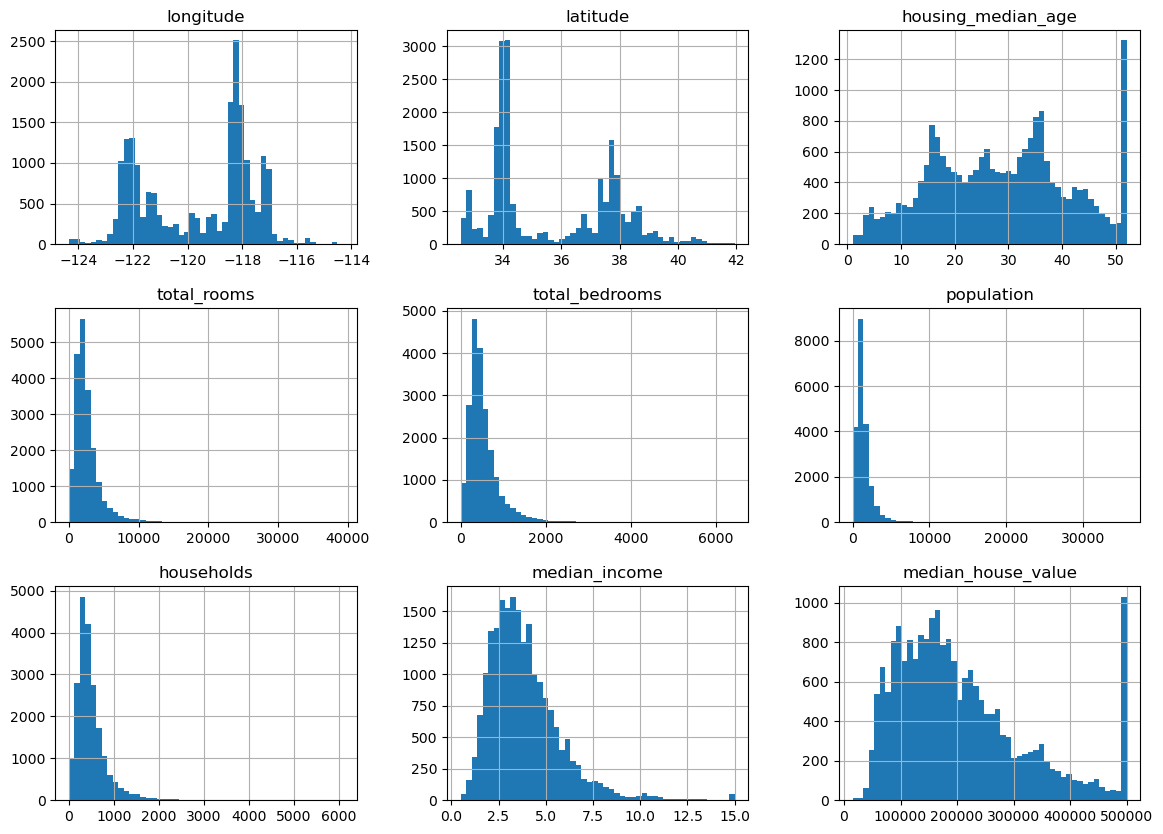

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize = (14,10))
plt.show()

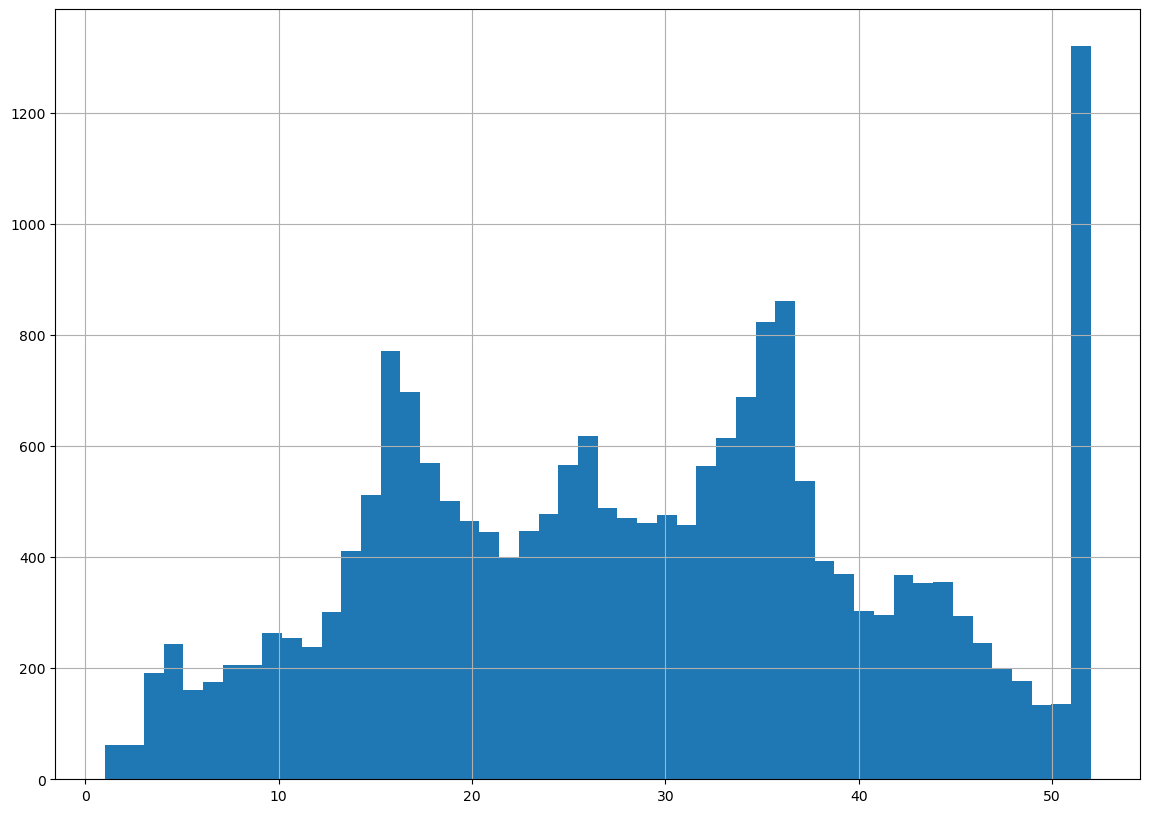

In [10]:
housing['housing_median_age'].hist(bins = 50,figsize = (14,10))
plt.show()

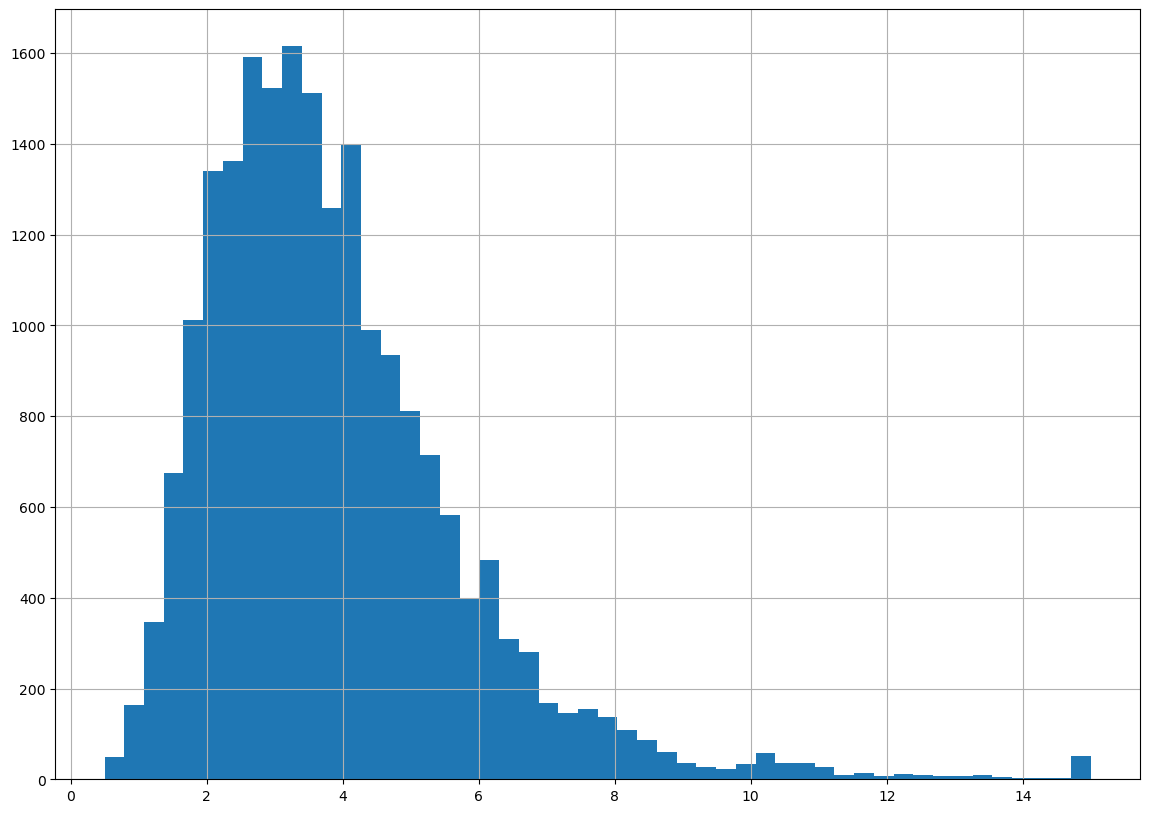

In [11]:
housing['median_income'].hist(bins = 50,figsize = (14,10))
plt.show()

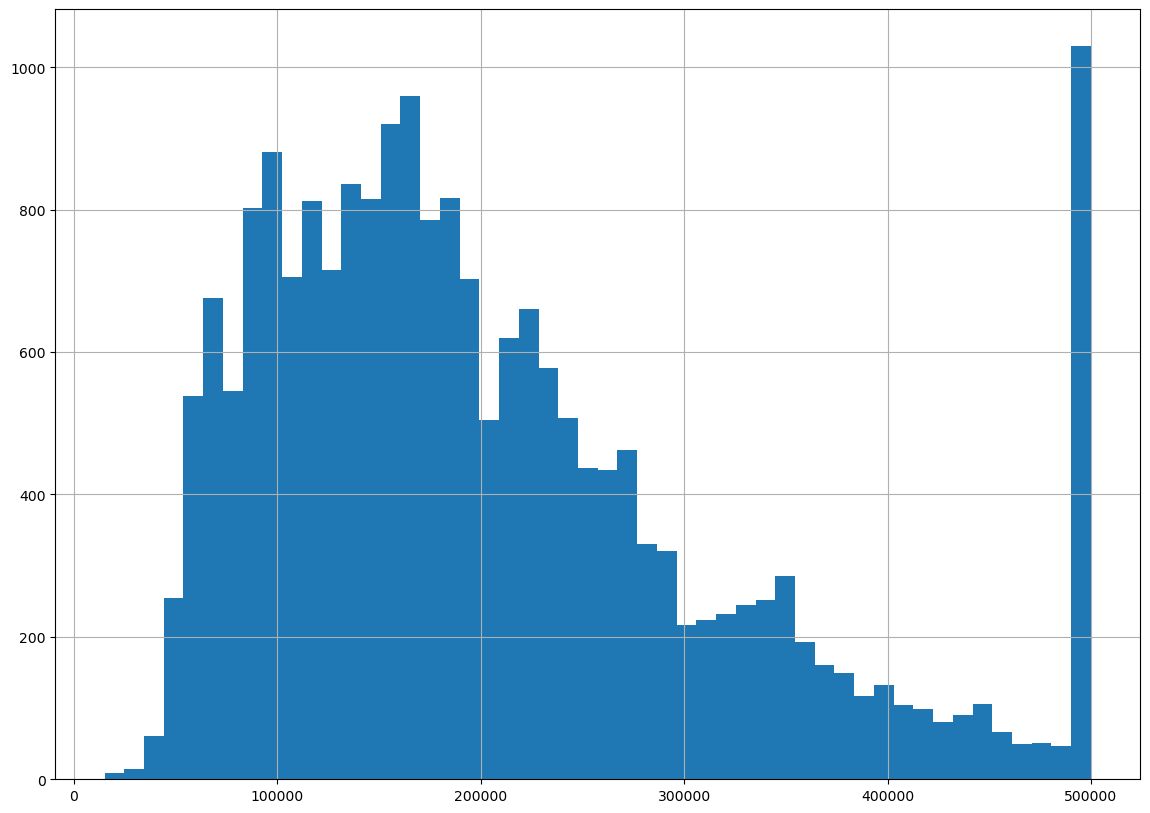

In [12]:
housing['median_house_value'].hist(bins = 50,figsize = (14,10))
plt.show()

In [13]:
#To implement Ml algorithm we should have a set of train and test through which we can train the model and than test later on

In [14]:
#This is the most basic way to split for test and train
import numpy as np
def split_test_and_train(data,test_ratio):
    #It will create a series of random number of 
    shuffle_indices = np.random.permutation(len(data))
    #It will gget the number of data we will take for testing purpose depends upon ratio and the length of the dataeset
    test_size = int(len(data) * test_ratio)
    #This variable will take the indices from shuffle indices seroies based upon the test ratio
    test_indices = shuffle_indices[:test_size]
    #This variable will take the indices for train from shuffle indices series based upon the test ratio
    train_indices = shuffle_indices[test_size:]
    #Return the value for test and train
    return data.iloc[train_indices],data.iloc[test_indices]
                    

In [15]:
train_set,test_set = split_test_and_train(housing,0.2)

In [16]:
len(train_set)

16512

In [17]:
len(test_set)

4128

In [18]:
#This is not an deal way to split data as every time you run the program a new set of train and test data will be there

In [19]:
housing = housing.reset_index(drop=False)

In [20]:
#For that reson we will try another method i.e using hash function . 
#We will it use it because it works on the index of the dataset so when you add a new data it will be stable 

In [21]:
from zlib import crc32
def is_id_in_the_test_set(identifier, test_ratio):
    # Convert id into 64-bit integer and check if it's in the test set
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [22]:
def split_data_with_id(data, id_column, test_ratio):
    #Making a series of ll the ids from id column
    ids = data[id_column]
    #Checking the ids suing hash
    in_test_set = ids.apply(lambda id_: is_id_in_the_test_set(id_, test_ratio))
    #Returning whether its in in_the_test or not
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
train_set, test_set = split_data_with_id(housing, "index", 0.2)

In [24]:
#This is also a good algo for splitting for testing and training data but you dont know that from where it has taken the test and training.But
#in Ml the model should have sample from every kind of ata for better output thats why the test and train set should have stratifed data

In [25]:
#In this datset we came to know that median_income is important atrribute for predict median_housing_prie

In [26]:
#Let us convert the median_income into a category

In [27]:
housing["median_income"].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [28]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

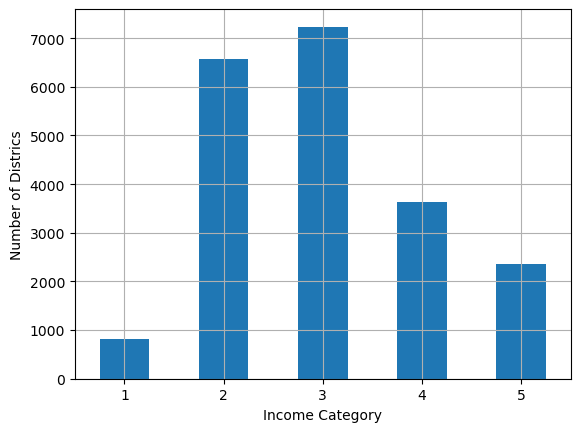

In [29]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districs")
plt.show()

In [30]:
#Se we can see different categories of income ovber here

In [31]:
#Now we can split the data using stratification of income

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#Here we are using train_test_split from sklearn.model_selection to split the data in train and test 
strat_train_set,strat_test_set = train_test_split(housing,test_size = 0.2, stratify = housing["income_cat"], random_state = 42)

In [34]:
#Enough of spliting data in test and train

In [35]:
# We have latitude and longitude in the dataset. We can plot in scatter to see pattern

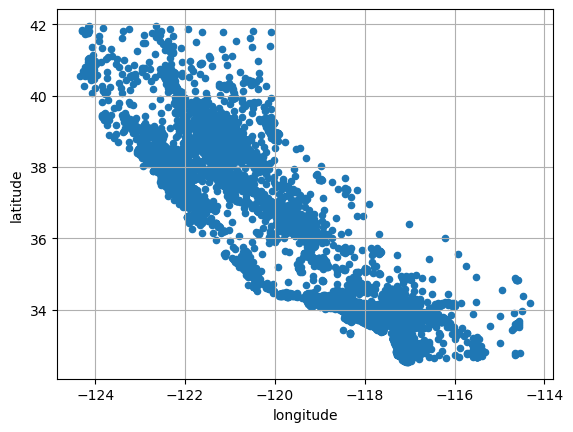

In [36]:
#It shows a map similar to california state but we cant see any patterm
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , grid = True)
plt.show()

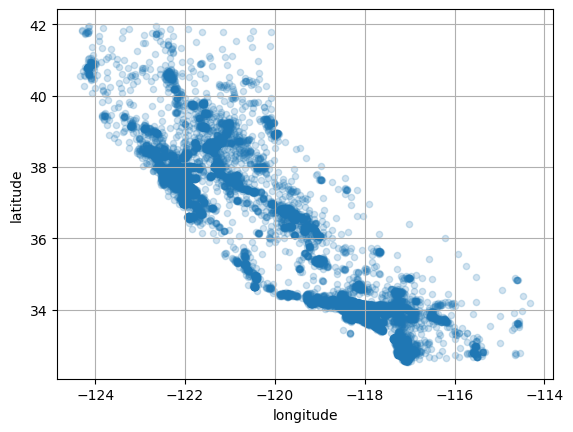

In [37]:
#Now we can see the pattern as we have reduceds the opacity of the datapoints so we can see the dense datapoints
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , grid = True,alpha =0.2)
plt.show()

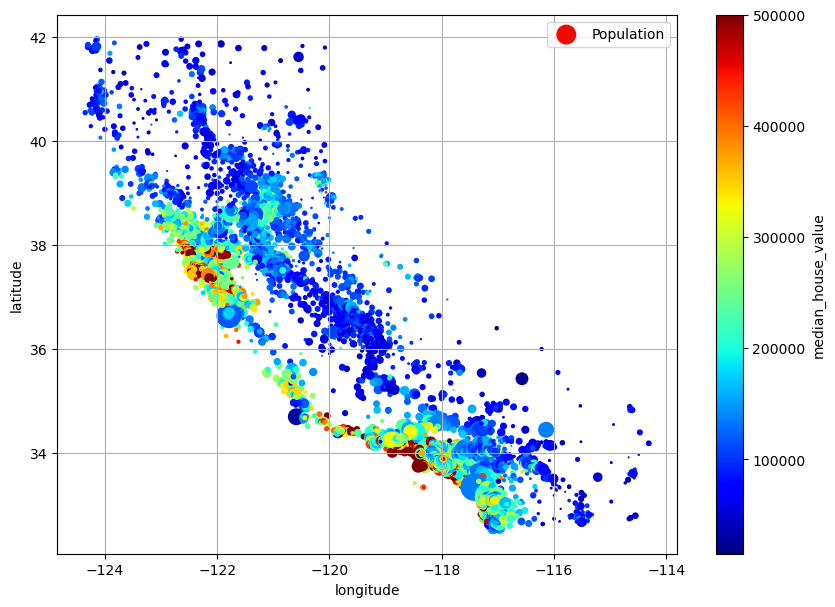

In [57]:
#Here we are making the pattern more clear. The size of the points shows the number of population, the colour map shows the median house price
#We can see the areas near the bay has higher prices and more than moderate population
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing['population']/100,
    label="Population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend =True,
    sharex=False,
    figsize=(10, 7)
)
plt.show()


In [58]:
#Let us now check the corelation of each coloum with other, to find the dependency

In [59]:
#For co relation we will user standard corelation coefficient (Pearson's r) using corr() method
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'NEAR BAY'

In [60]:
#Here got an error because our all columns have numerical value except the ocean proximity. So we will convert it into category
#Let us find the unique values
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [61]:
#We have 5 places . So we will change them to category and drop the string column
housing['ocean_proximity_cat'] = housing['ocean_proximity'].map({
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
})


In [62]:
housing.drop('ocean_proximity', axis=1, inplace=True)

In [63]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,4
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842,4
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260,4
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,4
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,4


In [64]:
corr_matrix = housing.corr()

In [65]:
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_cat
index,1.000000,-0.113254,0.081062,-0.181132,0.061896,0.032098,0.024880,0.030186,0.071673,0.072086,0.082963,0.042471,-0.112163,0.005545,0.013525
longitude,-0.113254,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690,-0.027540,0.092657,0.002476,-0.439870
latitude,0.081062,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528,0.106389,-0.113815,0.002366,0.390957
housing_median_age,-0.181132,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920,-0.153277,0.136089,0.013191,0.145163
total_rooms,0.061896,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528,0.133798,-0.187900,-0.024581,-0.016309
total_bedrooms,0.032098,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662,0.001538,0.084238,-0.028355,-0.021466
population,0.024880,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809,-0.072213,0.035319,0.069863,-0.083537
households,0.030186,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490,-0.080598,0.065087,-0.027309,-0.027144
median_income,0.071673,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750,0.326895,-0.615661,0.018766,-0.039673
median_house_value,0.072086,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892,0.151948,-0.255880,-0.023737,0.021732


In [66]:
corr_matrix["median_house_value"].sort_values(ascending =False)

median_house_value     1.000000
median_income          0.688075
income_cat             0.643892
rooms_per_house        0.151948
total_rooms            0.134153
housing_median_age     0.105623
index                  0.072086
households             0.065843
total_bedrooms         0.049686
ocean_proximity_cat    0.021732
people_per_house      -0.023737
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_ratio        -0.255880
Name: median_house_value, dtype: float64

In [67]:
from pandas.plotting import scatter_matrix

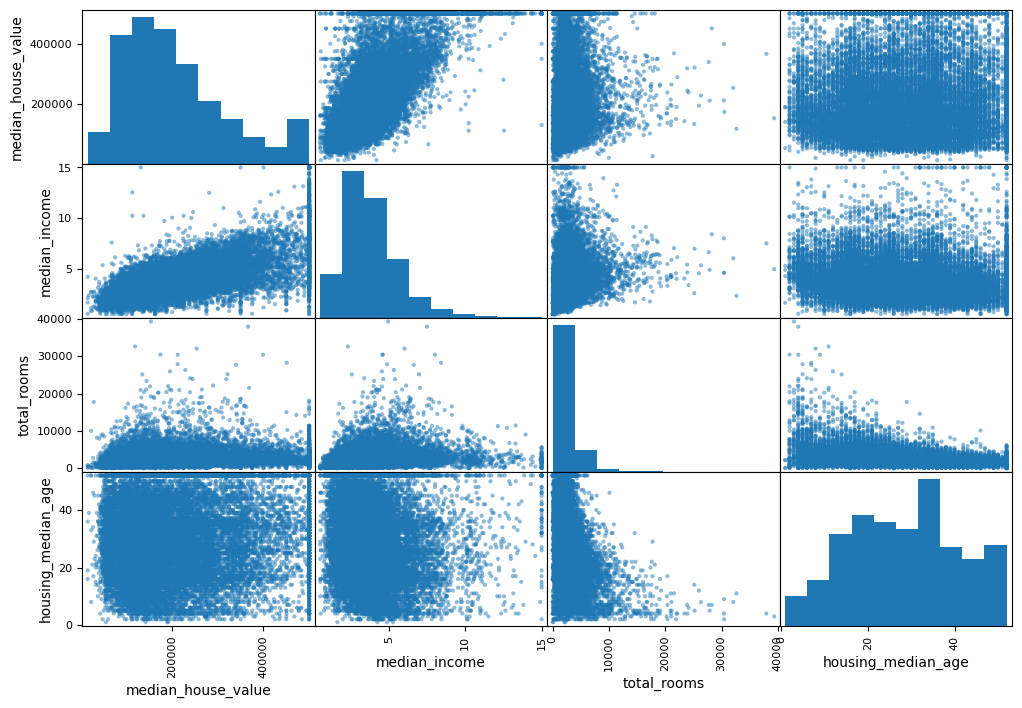

In [68]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

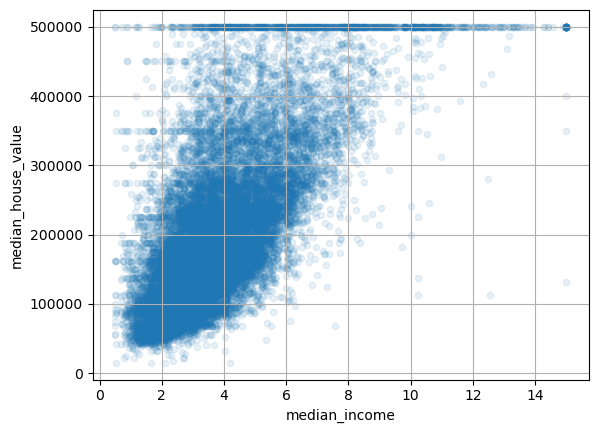

In [69]:
housing.plot(kind = 'scatter', x = "median_income", y = 'median_house_value', alpha = 0.1 , grid=True)
plt.show()

In [70]:
#You can notice that there is a horizental line in 500000 , 450000 , 350000 . This is due to the cap in the median house value.
#This means that any house with a value above certain limits, like 500,000, is recorded as exactly 500,000 in the dataset 

In [71]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,4
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842,4
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260,4
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,4
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,4


In [72]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']

In [73]:
housing['bedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms']

In [74]:
housing['people_per_house'] = housing['population']/housing['households']

In [75]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,4
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842,4
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260,4
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,4
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,4


In [79]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688075
income_cat             0.643892
rooms_per_house        0.151948
total_rooms            0.134153
housing_median_age     0.105623
index                  0.072086
households             0.065843
total_bedrooms         0.049686
ocean_proximity_cat    0.021732
people_per_house      -0.023737
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_ratio        -0.255880
Name: median_house_value, dtype: float64

In [84]:
#Here we are copying the training set to the housing dataset and dropping the house value
#We are dropping it because we want to predict this specific value. If we keep this column than the model will memorize the value
#So we will kleep the value in another dataset to compare the predicted  value and will predict the value based on other columns 
housing = strat_train_set.drop('median_house_value',axis = 1)

In [85]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [86]:
#This is the dataset we keep the value for comparison
housing_labels = strat_train_set['median_house_value'].copy()

In [87]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [89]:
#The worst thing can happen in a ML project is bad data or missing data. Suppose you got to know that the total_bedrooms has missing values
#You have 3 options : 
# 1. Get rid of whole corresponding district using dropna()
# 2. Get rid of whole column uisng drop()
# 3. Put missing value using fillna() by averaging other values or median

In [96]:
#Finding the median of the dataset
median = housing['total_bedrooms'].median()

In [98]:
#Replacing missing value in the column
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)

In [94]:
housing['total_bedrooms'].value_counts()

total_bedrooms
433.0    16512
Name: count, dtype: int64

In [ ]:
#Instead of imputing column by column we can use a class from scikit learn 

In [99]:
from sklearn.impute import SimpleImputer

In [100]:
imputer = SimpleImputer(strategy = 'median')

In [101]:
#Since we are using median strategy so this will work only on numerical data

In [103]:
housing_num = housing.select_dtypes(include = [np.number])

In [110]:
#It will calculate the median of every column in hosuing_num as we have used median strategy
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [105]:
 imputer.statistics_

array([ 1.03395e+04, -1.18510e+02,  3.42600e+01,  2.90000e+01,
        2.11900e+03,  4.33000e+02,  1.16400e+03,  4.08000e+02,
        3.54155e+00])

In [111]:
#It will fill the values in the missing place and the dataset will be stored in X but without any column or index
X = imputer.transform(housing_num)

In [112]:
#In this new variable of dataset we will copy the column name and index from housing_num and put it here
housing_tr = pd.DataFrame(X, columns = housing_num.columns , index = housing_num.index)

In [108]:
housing_tr.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,12655.0,-121.46,38.52,29.0,3873.0,433.0,2237.0,706.0,2.1736
15502,15502.0,-117.23,33.09,7.0,5320.0,433.0,2015.0,768.0,6.3373
2908,2908.0,-119.04,35.37,44.0,1618.0,433.0,667.0,300.0,2.8750
14053,14053.0,-117.13,32.75,24.0,1877.0,433.0,898.0,483.0,2.2264
20496,20496.0,-118.70,34.28,27.0,3536.0,433.0,1837.0,580.0,4.4964


In [113]:
#We have cleaned the numerical data and now its time for text and categorical data, if you remember we have 'ocean_proximity'